In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore") 

# Data Exploration

In [2]:
df = pd.read_csv("./mushrooms_Lucas.csv")
#There are many missing values in stalk root, 31% rows have missing values
pd.set_option('display.max_columns', None)
df.head()
#Table of all features and values

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g  
2                 n          n       m  
3                 k          s       u  
4                 n          a       g

In [3]:
df['stalk-color-above-ring'].value_counts()

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
len(df)

8124

In [7]:
df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

# Data Cleaning



<u>**Missing Value Analysis**</u>

In [8]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [9]:
df.replace('?', np.nan, inplace = True)

In [10]:
missing_df = (100*df.isnull().sum()/8124).to_frame()
missing_df.columns = ['percentage missing']
missing_df.sort_values(by = 'percentage missing')

percentage missing
class                               0.000000
spore-print-color                   0.000000
ring-type                           0.000000
ring-number                         0.000000
veil-color                          0.000000
veil-type                           0.000000
stalk-color-below-ring              0.000000
stalk-color-above-ring              0.000000
stalk-surface-below-ring            0.000000
stalk-surface-above-ring            0.000000
population                          0.000000
habitat                             0.000000
gill-color                          0.000000
gill-size                           0.000000
gill-spacing                        0.000000
gill-attachment                     0.000000
odor                                0.000000
bruises                             0.000000
cap-color                           0.000000
cap-surface                         0.000000
cap-shape                           0.000000
stalk-shape                         0.000000
stalk-root                         30.526834

Column 'stalk-root' contains too many missing values, we decide to drop this column

In [11]:
#Make a list of what you want to drop
columns_to_drop = ['stalk-root']

#Drop the columns using drop()
df.drop(columns_to_drop, axis=1, inplace = True) #axis = 1 lets pandas know we are dropping columns, not rows.

#Check that they are dropped
df.head(1)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   

  gill-spacing gill-size gill-color stalk-shape stalk-surface-above-ring  \
0            c         n          k           e                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   

  veil-type veil-color ring-number ring-type spore-print-color population  \
0         p          w           o         p                 k          s   

  habitat  
0       u

In [12]:
df.shape

(8124, 22)

# Data Preprocessing



<u>**Encode Labels**</u>

In [13]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object':
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

df = labelencoder(df.copy())
# lbl = LabelEncoder()
# lbl.fit(list(df['class'].values))
# df['class'] = lbl.transform(df['class'].values)

df.head()
#Converts string values into numeric values

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-surface-above-ring  \
0             0          1           4            0                         2   
1             0          0           4            0                         2   
2             0          0           5            0                         2   
3             0          1           5            0                         2   
4             1          0           4            1                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0          0           2            1          4                  2   
1          0           2            1          4                  3   
2          0           2            1          4                  3   
3          0           2            1          4                  2   
4          0           2            1          0                  3   

   population  habitat  
0           3        5  
1           2        1  
2           2        3  
3           3        5  
4           0        1

<u>**Removal of Veil\-Type**</u>


In [14]:
px.pie(df, values='class', names='veil-type')

In [15]:
#Make a list of what you want to drop
columns_to_drop = ['veil-type']

#Drop the columns using drop()
df = df.drop(columns_to_drop, axis=1, inplace = False) #axis = 1 lets pandas know we are dropping columns, not rows.

#Check that they are dropped
df.head(1)

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-surface-above-ring  \
0             0          1           4            0                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  
0           2            1          4                  2           3        5

<u>**Feature Encoding**</u>



In [16]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

target = df['class']
input_columns = df.loc[:, df.columns != "class"]

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

te = TargetEncoder(cols=input_columns.columns).fit(input_columns, target)
input_columns = te.transform(input_columns)

input_columns.head()

cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0   0.467177     0.552426   0.446585  0.184834  1.000000         0.492545   
1   0.467177     0.552426   0.626866  0.184834  0.000000         0.492545   
2   0.106195     0.552426   0.307692  0.184834  0.000000         0.492545   
3   0.467177     0.536375   0.307692  0.184834  1.000000         0.492545   
4   0.467177     0.552426   0.439130  0.693345  0.034014         0.492545   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-surface-above-ring  \
0      0.558426   0.885350    0.156863     0.540387                  0.296754   
1      0.558426   0.301497    0.156863     0.540387                  0.296754   
2      0.558426   0.301497    0.106870     0.540387                  0.296754   
3      0.558426   0.885350    0.106870     0.540387                  0.296754   
4      0.085366   0.301497    0.156863     0.437500                  0.296754   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                  0.311183                0.383513                0.383212   
1                  0.311183                0.383513                0.383212   
2                  0.311183                0.383513                0.383212   
3                  0.311183                0.383513                0.383212   
4                  0.311183                0.383513                0.383212   

   veil-color  ring-number  ring-type  spore-print-color  population   habitat  
0    0.493185     0.508547   0.205645           0.119658    0.294872  0.739130  
1    0.493185     0.508547   0.205645           0.113821    0.000000  0.344507  
2    0.493185     0.508547   0.205645           0.113821    0.000000  0.123288  
3    0.493185     0.508547   0.205645           0.119658    0.294872  0.739130  
4    0.493185     0.508547   0.636888           0.113821    0.000000  0.344507

In [17]:
input_columns.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

<u>**Data Splitting**</u>

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 20)
(1625, 20)
(6499,)
(1625,)


# Data Visualization



In [20]:
#px.bar(df, x = "cap-color", y = "class", barmode = "group", color = 'class', height = 400)
#Don't use bar graphs unless y is small amount of rows, use histogram or pie chart instead

In [21]:
fig = px.histogram(df, x="cap-color", color='class', title = 'Proportion of poisonous to palatable mushrooms organized by cap-colour',
                  color_discrete_map = {0:'#B99C6B',1:'#404F24'})
fig.show()
fig.write_html('./Webpage/assets/img/histogram1.html')

In [22]:
fig = px.histogram(df, x="population", color='class', title = 'Proportion of poisonous to palatable mushrooms organized by population type',
                  color_discrete_map = {0:'#B99C6B',1:'#404F24'})
fig.show()

<u>**Scatter Plot Matrix**</u>: May show some sort of correlation



In [23]:
df_matrix = df[['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','class']]
fig = px.scatter_matrix(df_matrix, color = 'class', color_continuous_scale=px.colors.sequential.Bluered,)
fig.update_layout(width=1200, height=1200)
fig.show()
#pleas don't break
#shows what features mushrooms will usually contain and what combinations won't normally be seen?

In [24]:
fig = px.histogram(df, x="odor", color='class', title = 'Proportion of poisonous to palatable mushrooms organized by odor',
                  color_discrete_map = {0:'#B99C6B',1:'#404F24'})
fig.show()
#shows a very strong correlation between mushroom odor and palatability

In [25]:
df_matrix = df[['stalk-surface-above-ring','stalk-surface-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat', 'class']]
fig = px.scatter_matrix(df_matrix, color = 'class')
fig.show()
#the error was that there were two 'stalk-surface-above-ring','stalk-surface-below-ring' in the list btw

In [26]:
px.pie(df, values='class', names='gill-spacing',title = 'Percentage of poisonous mushrooms of a specific gill-spacing', color_discrete_sequence=px.colors.sequential.Brwnyl)
#first need to change to numeric values
#only shows poisonous mushrooms and which ones have more poisonous mushrooms 

In [27]:
df_temp = df.drop(df[df.bruises != 0].index) #removes all rows without value of 0 in column bruises
df_temp['placeholder'] = 1 #placeholder of 1s to use for making a pie chart
px.pie(df_temp, values = 'placeholder', names = "class", title = 'Percentage of poisonous to palatable brown cap colour mushrooms', color_discrete_sequence=px.colors.sequential.Brwnyl)
#is it possible to create these pie charts using variables instead so we don't have to maunually write this out every time

This is a correlation heatmap for our dataset, which measures the correlation among all the columns. As we take a look at the first row, it shows the correlation between our target variable 'class' and all other features. We find out the column 'gill-size' has the largest correlation with our target, as the correlation value reaches 0.54.

In [28]:
import plotly.figure_factory as ff

df_corr = df.corr() # Generate correlation matrix


x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Brwnyl',
    showscale=True,
    )
fig.update_xaxes(side="bottom")
fig.update_layout(
    # title_text='Heatmap', 
    title_x=0.5, 
    width=1000, 
    height=1000,
    yaxis_autorange='reversed',
    template='plotly_white'
)
fig.write_html("./images/heatmap.html")
fig.show()


In [29]:
px.scatter(df ,x = "gill-attachment", y = "veil-color", color = "class")
# If stalk surface above ring is 1 then it seems to always be poisonous

In [30]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

N = 70

fig = go.Figure(data=[go.Mesh3d(x=(df['cap-color']),
                   y=(df['stalk-color-above-ring']),
                   z=(df['gill-color']),
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=[-100,100],),
#                      yaxis = dict(nticks=4, range=[-50,100],),
#                      zaxis = dict(nticks=4, range=[-100,100],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

fig.show()

# Machine Learning Models

## KNN

In [31]:
import sklearn #our favorite machine learning library
from sklearn.neighbors import KNeighborsClassifier as KNN #this will import our model as KNN

<u>**Hyper-parameters Tuning**</u>

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1, 21))}
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [33]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [34]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 100.00%


In [35]:
# best_knn = grid_search.best_estimator_
# feat_imps = zip(input_columns, best_knn.feature_importances_)
# print(feat_imps)
# ax = sns.barplot(list(feats), list(imps))
# ax.tick_params(axis='x', rotation=90)
# print('Top 3 most important features from the trained XGBoost model:', feats[:3])

<u>**Train, test and evaluate the best model**</u>

In [36]:
k = 100
my_KNN_model = KNN(n_neighbors=k)
my_KNN_model.fit(x_train, y_train)
y_hat = my_KNN_model.predict(x_test)

In [38]:
import pickle

filename = 'knn.sav'
pickle.dump(my_KNN_model, open(filename, 'wb'))

In [38]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.004923076923076923


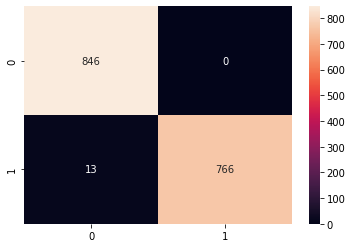

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
fig = cm.get_figure()
# fig.savefig("./images/cm_KNN.png") 

In [40]:
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,f1_score

print("accuracy on test set::",metrics.accuracy_score(y_test, y_hat))
print("recall on test set:", recall_score(y_test, y_hat, pos_label=1))
print("precision on test set:", precision_score(y_test, y_hat, pos_label=1))
print("F1-score on test set:", f1_score(y_test, y_hat, pos_label=1))

accuracy on test set:: 0.992
recall on test set: 0.9833119383825417
precision on test set: 1.0
F1-score on test set: 0.9915857605177993


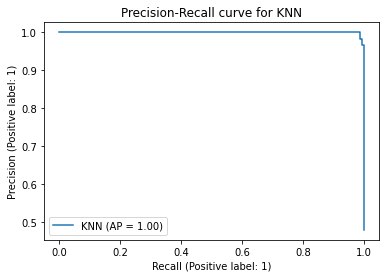

In [41]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(my_KNN_model, x_test, y_test, name="KNN")
_ = display.ax_.set_title("Precision-Recall curve for KNN")

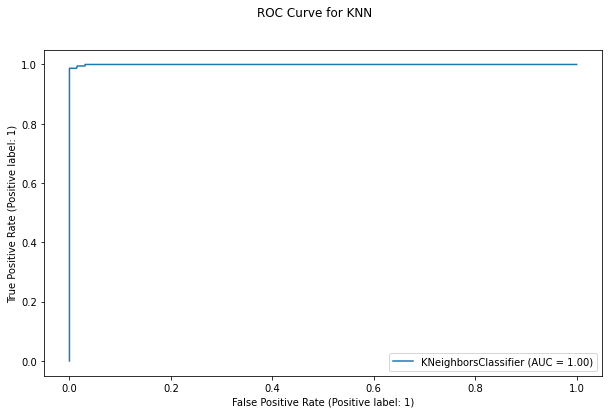

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for KNN')
plot_roc_curve(my_KNN_model, x_test, y_test, ax=axes)
plt.show()

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
coef = pd.Series(my_KNN_model, index = X.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

<u>**User Input and Prediction**</u>



In [44]:
# my_data = []
# for col in input_columns.columns:
#     user_input = input("Input " + col + " here: ")
#     my_data.append(float(user_input))

# my_data = np.array(my_data)
# my_data = my_data.reshape(1,20)

# res = my_KNN_model.predict(my_data)
# print("The prediction is: ", res[0]) 

# SVC



In [45]:
from sklearn.svm import SVC
clf = SVC()

In [46]:
clf.fit(x_train, y_train)

SVC()

In [47]:
y_hat = clf.predict(x_test)
y_hat

array([0, 1, 0, ..., 1, 0, 1])

In [48]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.0


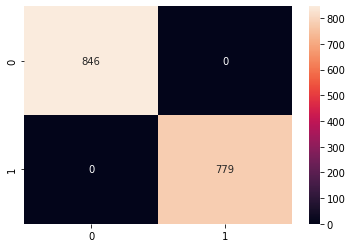

In [49]:
fig = sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
fig = fig.get_figure()
fig.savefig("./images/confusion_perf.png") 

In [50]:
my_SVC_model = SVC()
parameters = {'C': [0.1, 0.5, 1, 5, 10, 15, 20, 30]}
clf = GridSearchCV(my_SVC_model, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 15, 20, 30]})

In [51]:
print(clf.best_params_)

{'C': 5}


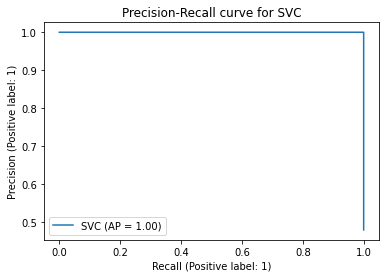

In [52]:
display = PrecisionRecallDisplay.from_estimator(clf, x_test, y_test, name="SVC")
pr_curve = display.ax_.set_title("Precision-Recall curve for SVC")
plt.savefig('./images/pr_curve.png')

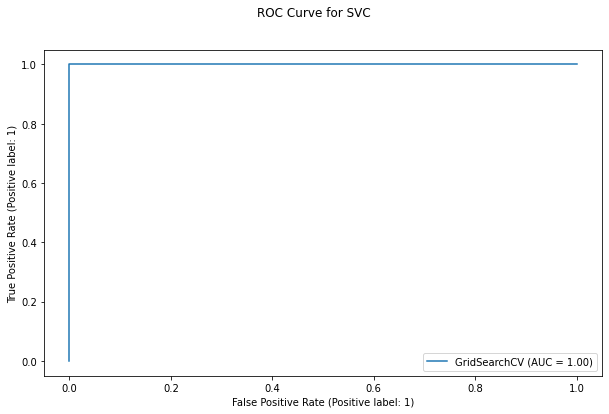

<Figure size 432x288 with 0 Axes>

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for SVC')
plot_roc_curve(clf, x_test, y_test, ax=axes)
plt.show()
plt.savefig('./images/roc_curve.png')

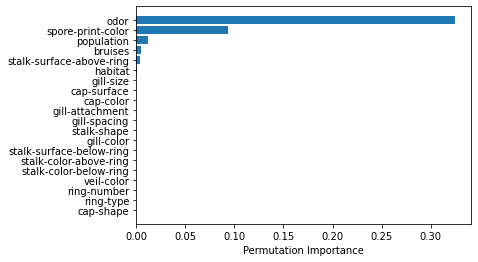

In [54]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, x_test, y_test)

feature_names = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.savefig('./images/feat_imps.png')

# Random Forest



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [63]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

0.0


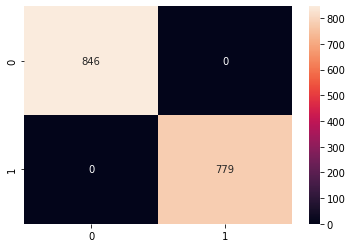

In [64]:
y_hat = rf_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
total_squared_error = (np.sum((y_test - y_hat)**2)) 
mean_squared_error = total_squared_error/len(y_test) 
print(mean_squared_error)

In [65]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()
params = {
    'n_estimators' : [50, 100, 150]
}
CV_rf = GridSearchCV(rf_model, params)
CV_rf.fit(x_train, y_train)
print(CV_rf.best_params_)

{'n_estimators': 50}


<AxesSubplot:>

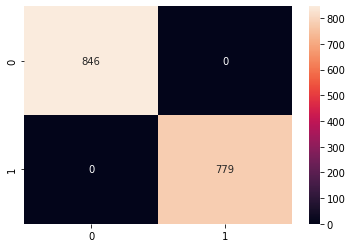

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_hat = CV_rf.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

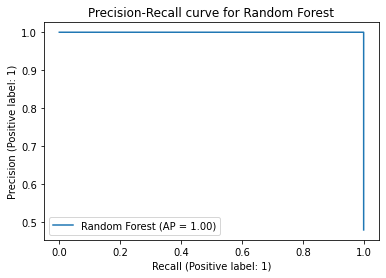

In [67]:
display = PrecisionRecallDisplay.from_estimator(clf, x_test, y_test, name="Random Forest")
_ = display.ax_.set_title("Precision-Recall curve for Random Forest")

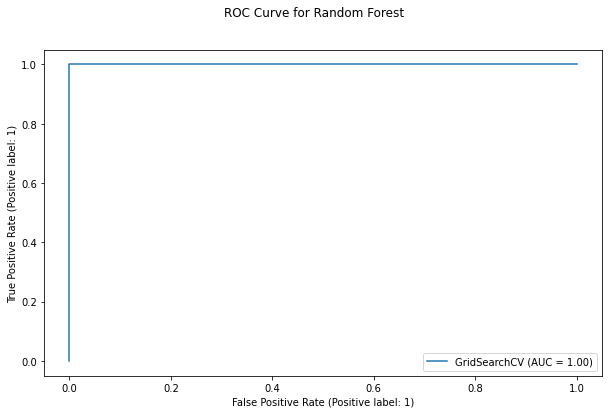

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for Random Forest')
plot_roc_curve(clf, x_test, y_test, ax=axes)
plt.show()

In [69]:
# shows visualization of any single tree in forest. to change tree change the number in the rf_model.estimators brackets.
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(x_train, y_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
estimator = rf_model.estimators_[1]
export_graphviz(estimator, out_file = 'tree.dot', feature_names = x_train.columns, class_names = 'class', rounded = True, proportion = False, precision = 2, filled = True)
from subprocess import call
call(['dot','-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = './images/tree.png')

<AxesSubplot:>

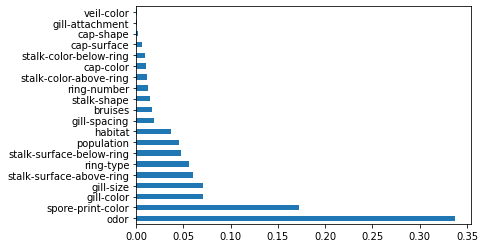

In [70]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh')) 
#

<h2>
    Neural Networks
</h2>



In [71]:
from sklearn.neural_network import MLPClassifier as MLPC

In [72]:
my_MLPC_model = MLPC() #Default for hidden layer size is (100,)
my_MLPC_model.fit(x_train, y_train)

MLPClassifier()

In [73]:
y_hat = my_MLPC_model.predict(x_test)
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.0


<AxesSubplot:>

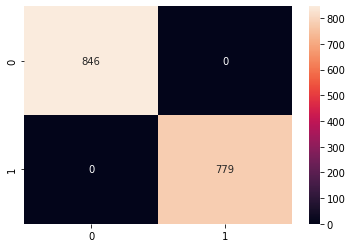

In [74]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [75]:
parameters = {'hidden_layer_sizes': [(20,), (40,), (60,), (80,), (100,)]}
clf = GridSearchCV(my_MLPC_model, parameters)
clf.fit(x_train, y_train) #takes a long time

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(20,), (40,), (60,), (80,),
                                                (100,)]})

In [76]:
print(clf.best_params_)

{'hidden_layer_sizes': (20,)}


In [77]:
y_hat = my_MLPC_model.predict(x_test)
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.0


<AxesSubplot:>

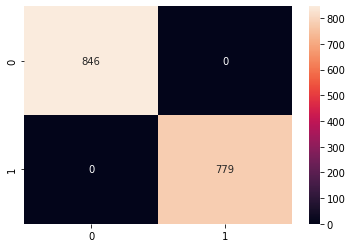

In [78]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

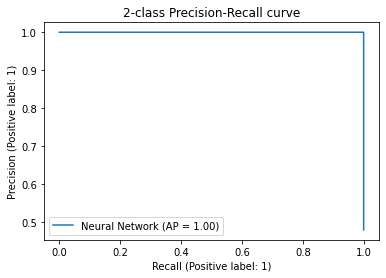

In [79]:
display = PrecisionRecallDisplay.from_estimator(my_MLPC_model, x_test, y_test, name="Neural Network")
_ = display.ax_.set_title("2-class Precision-Recall curve") #error is too small to be noticed on the graph?

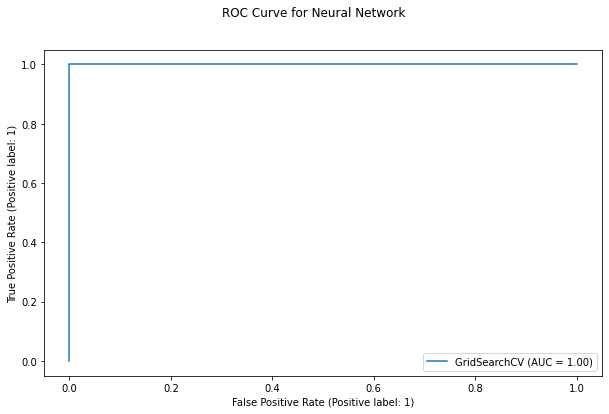

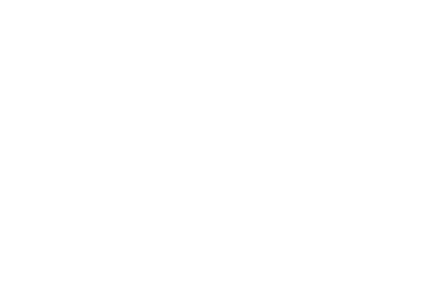

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for Neural Network')
plot_roc_curve(clf, x_test, y_test, ax=axes)
plt.show()
Image(filename = './images/roc_curve.png')

In [81]:
from sklearn.metrics import accuracy_score

def get_feature_importance(j, n):
  s = accuracy_score(y_test, y_hat) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(x_test.shape[0]))
    x_test_ = x_test.copy()
    x_test_[:, j] = x_test[perm, j]
    y_hat_ = clf.predict(x_test_)
    s_ij = accuracy_score(y_test, y_hat_)
    total += s_ij
  return s - total / n


In [82]:
x_test.shape[1]

20

In [83]:
# f = []
# for j in range(x_test.shape[1]):
#   f_j = get_feature_importance(j, 100)
#   f.append(f_j)

# plt.figure(figsize=(10, 5))
# plt.bar(range(x_test.shape[1]), f, color="r", alpha=0.7)
# plt.xticks(ticks=range(x_test.shape[1]))
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.title("Feature importances (Iris data set)")
# plt.show()

### decision tree



<class 'sklearn.tree._classes.DecisionTreeClassifier'>


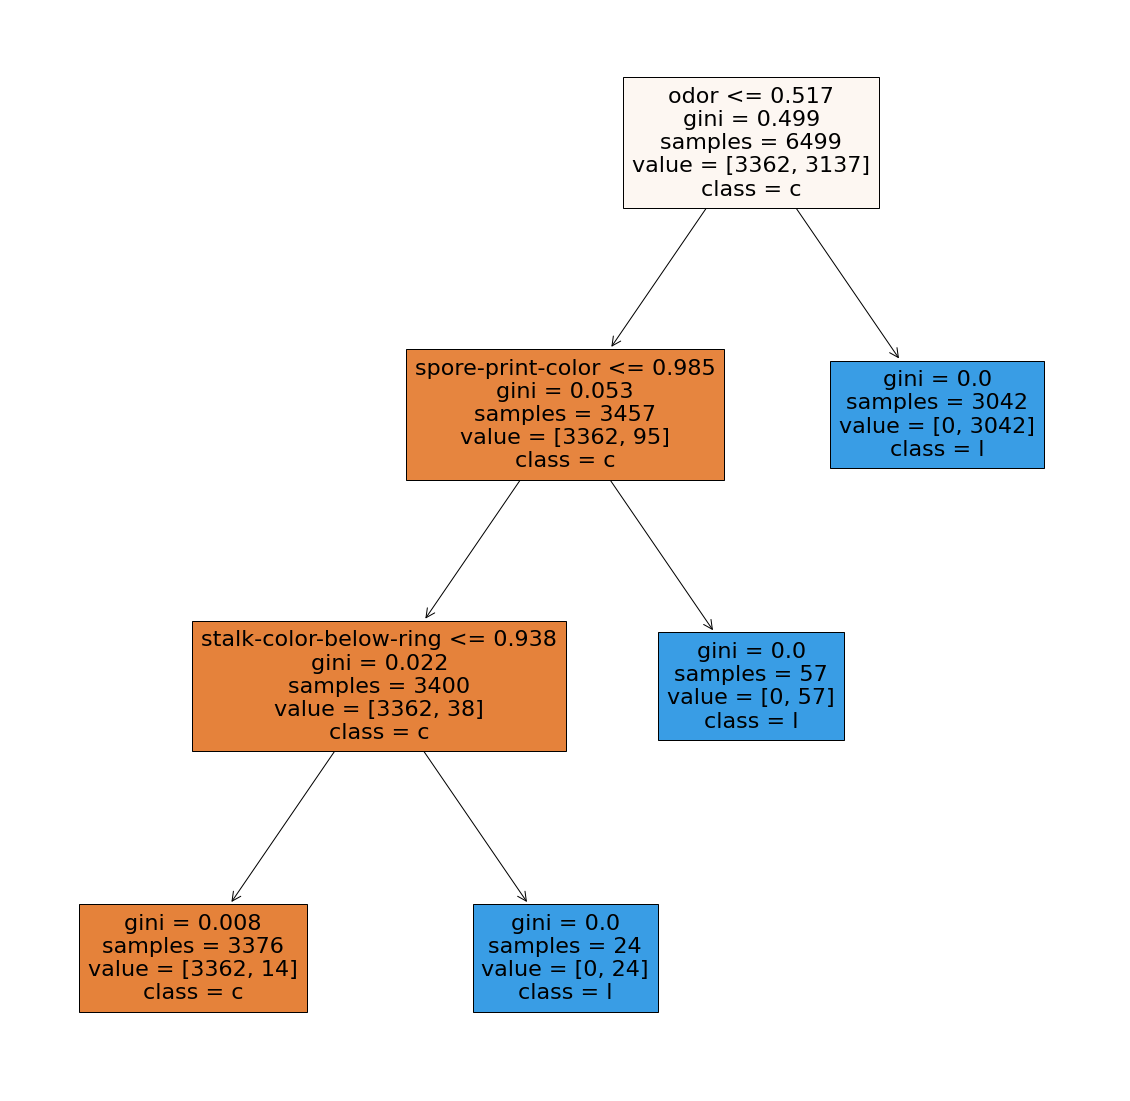

In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=3, random_state=100)
print(type(model))

model.fit(x_train, y_train)

plt.figure(figsize=(20,20))
plot_tree(model,
         feature_names=input_columns.columns,
         class_names='class',
          filled = True
         )
plt.savefig('./images/decision_tree.png')
plt.show()
